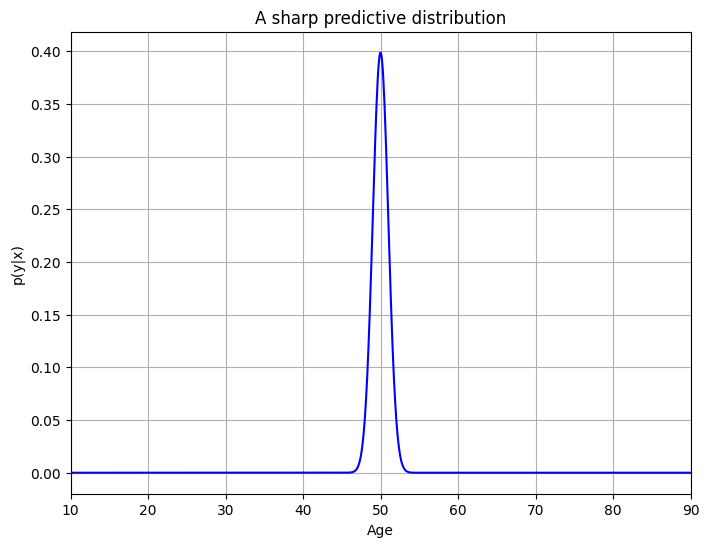

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the Gaussian distribution
mu = 50  # mean
sigma = 1  # standard deviation

# Creating a range of values for x (age)
x = np.linspace(10, 90, 1000)

# Calculating the probability density function (PDF) of the Gaussian distribution
p_y_given_x = norm.pdf(x, mu, sigma)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x, p_y_given_x, color='blue')
plt.title('A sharp predictive distribution')
plt.xlabel('Age')
plt.ylabel('p(y|x)')
plt.xlim(10, 90)
plt.grid(True)
plt.show()


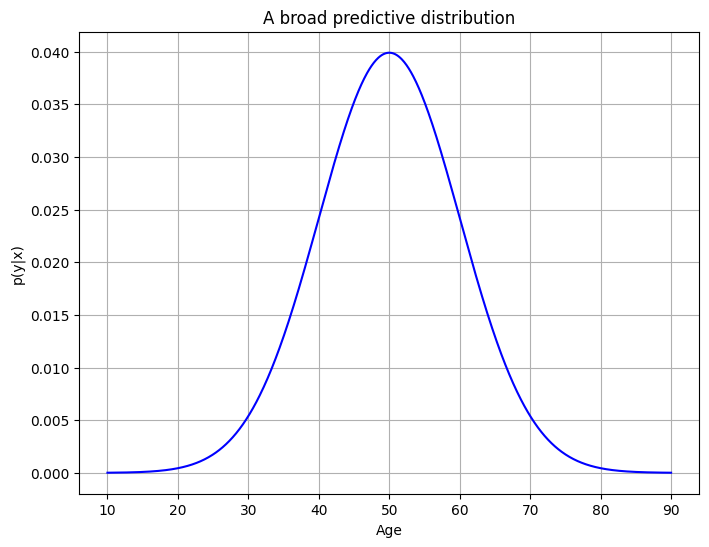

In [49]:
# Adjusting the standard deviation
sigma = 10  # new standard deviation


# Recalculating the probability density function (PDF) of the Gaussian distribution
p_y_given_x = norm.pdf(x, mu, sigma)

# Replotting
plt.figure(figsize=(8, 6))
plt.plot(x, p_y_given_x, color='blue')
plt.title('A broad predictive distribution')
plt.xlabel('Age')
plt.ylabel('p(y|x)')
plt.grid(True)
plt.show()


# PIT Histograms

### Preliminaries

Quantiles of a random variable are uniformly distributed between 0 and 1. 


$$
    y \sim Y       \quad \text{random draws from some Distribution}  \\
    q = F_Y(y)  \quad \text{quantile of y, using the CDF of Y}
$$

[1.01070991 0.82604868 2.87436005 2.23096329 0.77655299]
[0.42493273 0.35422027 0.95297007 0.84872098 0.33598458]


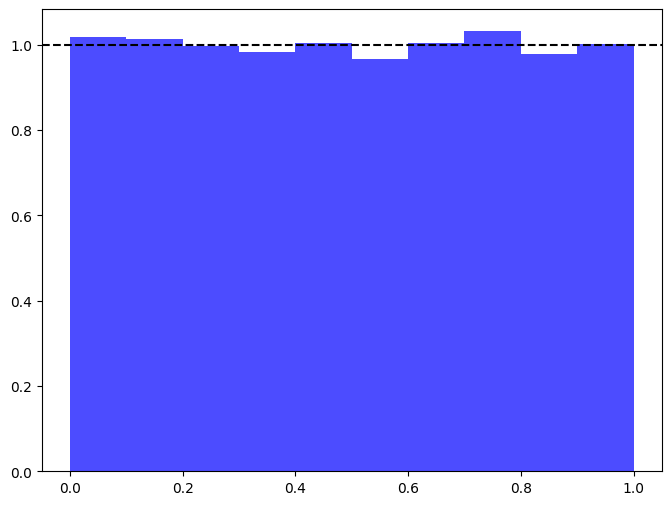

In [50]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as stats
dist = stats.norm(1.2, 1)    # Mean = 1.2, Std = 1
y = dist.rvs(10**4)          # Randomly sample 1000 values from the distribution
q = dist.cdf(y)              # Calculate the CDF of the sampled values (quantiles)
print(y[0:5])
print(q[0:5])
plt.figure(figsize=(8, 6))
plt.hist(q, bins=10, density=True, color='blue', alpha=0.7)
plt.axhline(y=1, color='k', linestyle='--')




#### Ideal Case

The ideal case the predicted distribution is the same as the true distribution. 

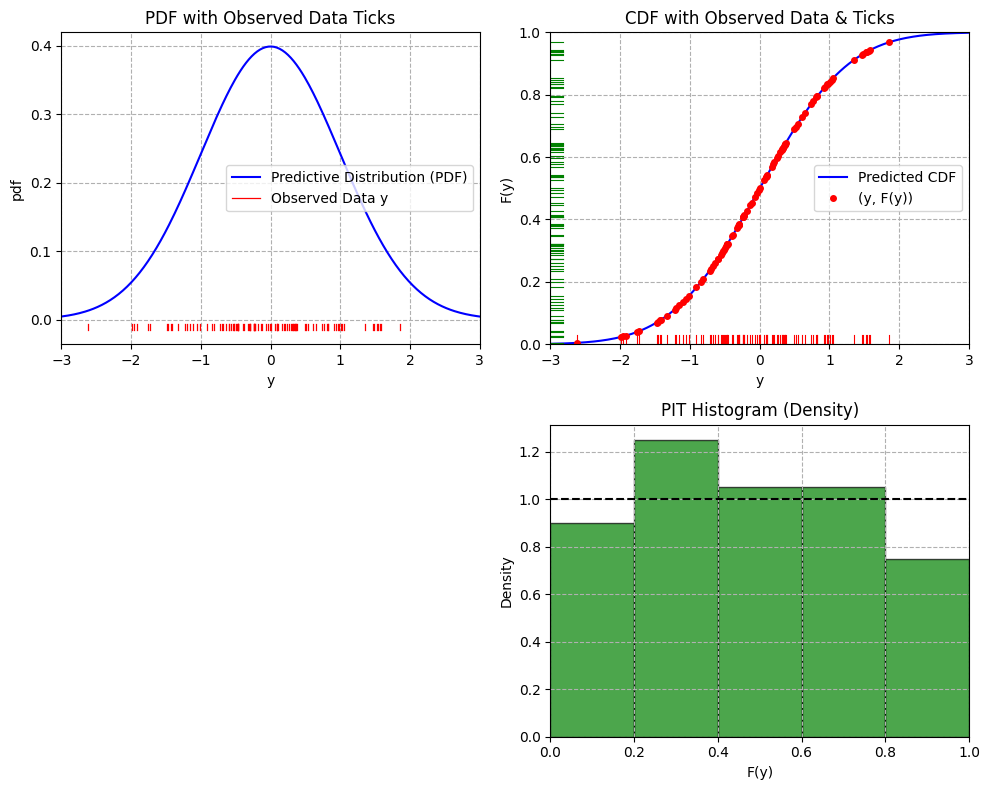

In [51]:
def plot_pit_calibration(y_observed, distribution, xlims=(-3, 3), bins=10):
    """
    Creates a 2×2 grid of plots to visualize calibration via the Probability
    Integral Transform (PIT).

    Parameters
    ----------
    y_observed : array-like
        Observed data points.
    distribution : object
        A distribution object that implements .pdf(x) and .cdf(x).
        For example, from scipy.stats: distribution = norm(loc=0, scale=1)
    xlims : tuple (min_x, max_x)
        Range of x-values for plotting the PDF and CDF.
    bins : int
        Number of bins for the PIT histogram.

    Returns
    -------
    fig, axes : Matplotlib figure and axes array.
    """

    # ------------------------------------------
    # 1. Prepare data and grid for plotting
    # ------------------------------------------
    y_observed = np.asarray(y_observed)
    x = np.linspace(xlims[0], xlims[1], 300)  # for smooth PDF/CDF lines

    # Theoretical PDF and CDF from the distribution
    pdf_theoretical = distribution.pdf(x)
    cdf_theoretical = distribution.cdf(x)

    # PIT values: F(y) for each observed y
    F_obs = distribution.cdf(y_observed)

    # ------------------------------------------
    # 2. Create a 2x2 plotting canvas
    #    top-left: PDF
    #    top-right: CDF
    #    bottom-left: empty
    #    bottom-right: PIT histogram
    # ------------------------------------------
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    ax_pdf    = axes[0, 0]  # top-left
    ax_cdf    = axes[0, 1]  # top-right
    ax_blank  = axes[1, 0]  # bottom-left
    ax_pit    = axes[1, 1]  # bottom-right

    # Turn off the bottom-left axis
    ax_blank.set_visible(False)

    # ------------------------------------------
    # 3. Top-left: PDF + data ticks on the x-axis
    # ------------------------------------------
    ax_pdf.plot(x, pdf_theoretical, 'b-', label='Predictive Distribution (PDF)')
    ax_pdf.set_title('PDF with Observed Data Ticks')
    ax_pdf.set_xlabel('y')
    ax_pdf.set_ylabel('pdf')
    ax_pdf.set_xlim(xlims)

    # Add short red vertical lines (ticks) at each observed data point
    # We'll just draw them near the bottom of the plot.
    y_min, y_max = ax_pdf.get_ylim()
    for obs in y_observed:
        ax_pdf.plot([obs, obs], [y_min, y_min + 0.02 * (y_max - y_min)], 
                    color='r', linewidth=0.9)
    ax_pdf.plot([obs, obs], [y_min, y_min + 0.02 * (y_max - y_min)], color='r', linewidth=0.9, label='Observed Data y')

    ax_pdf.legend()
    ax_pdf.grid(True, linestyle='--')

    # ------------------------------------------
    # 4. Top-right: CDF + (y, F(y)) points + ticks on both axes
    # ------------------------------------------
    ax_cdf.plot(x, cdf_theoretical, 'b-', label='Predicted CDF')
    ax_cdf.plot(y_observed, F_obs, 'ro', markersize=4, label='(y, F(y))')

    ax_cdf.set_title('CDF with Observed Data & Ticks')
    ax_cdf.set_xlabel('y')
    ax_cdf.set_ylabel('F(y)')
    ax_cdf.set_xlim(xlims)
    ax_cdf.set_ylim([0, 1])
    ax_cdf.legend()
    ax_cdf.grid(True, linestyle='--')

    # Add ticks on the x-axis for y
    # We'll draw short lines at the bottom fraction of the axis range.
    for obs in y_observed:
        ax_cdf.axvline(x=obs, color='r', linewidth=0.8, ymin=0.0, ymax=0.03)

    # Add ticks on the y-axis for F(y)
    # We'll draw short lines at the left fraction of the axis range.
    for f_val in F_obs:
        ax_cdf.axhline(y=f_val, color='g', linewidth=0.8, xmin=0.0, xmax=0.03)

    # ------------------------------------------
    # 5. Bottom-right: PIT histogram (density=True)
    # ------------------------------------------
    ax_pit.hist(F_obs, bins=bins, range=(0, 1), density=True,
                alpha=0.7, color='g', edgecolor='black')
    ax_pit.set_title('PIT Histogram (Density)')
    ax_pit.set_xlabel('F(y)')
    ax_pit.set_ylabel('Density')
    ax_pit.set_xlim([0, 1])
    ax_pit.grid(True, linestyle='--')

    # Add line at (0,1) to (1,1) for reference
    ax_pit.axhline(y=1, color='k', linestyle='--')

    plt.tight_layout()
    return fig, axes


# ----------------------------------------------------------------------
# Example usage (uncomment to run):
# ----------------------------------------------------------------------
np.random.seed(42)
y_obs_example = np.random.normal(loc=0, scale=1, size=100)
fig, axes = plot_pit_calibration(y_obs_example, norm(loc=0, scale=1), bins=5)
plt.show()

### Too narrow prediction

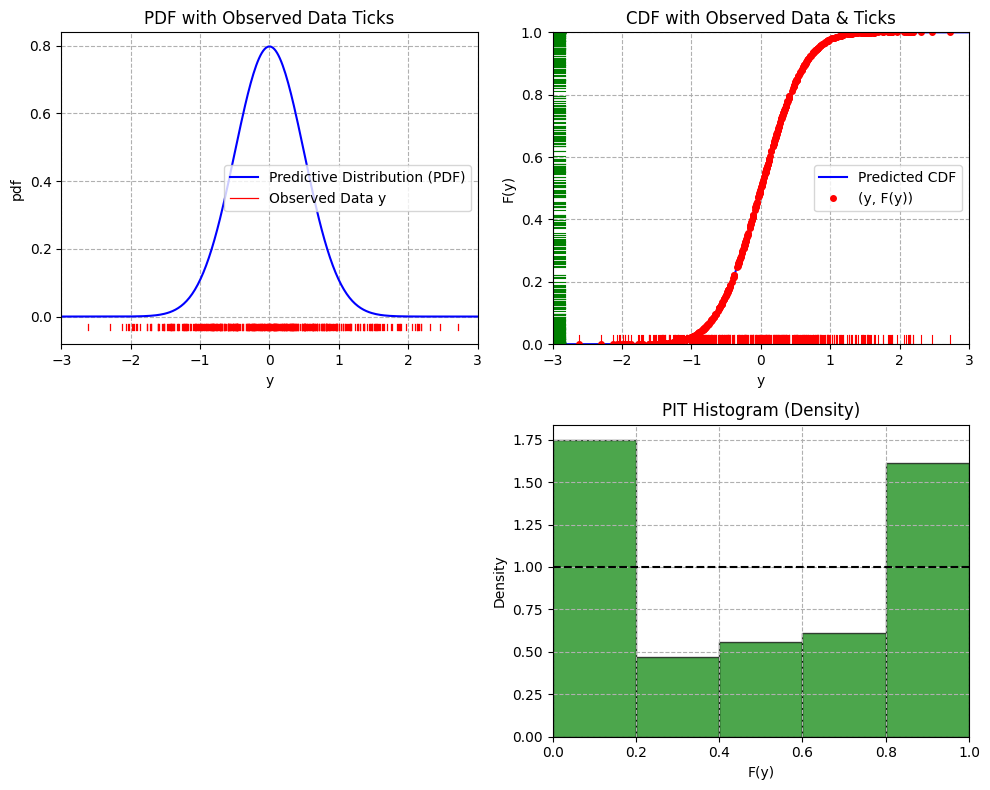

In [52]:
np.random.seed(42)
y_obs_example = np.random.normal(loc=0, scale=1, size=500)
fig, axes = plot_pit_calibration(y_obs_example, norm(loc=0, scale=0.5), bins=5)
plt.show()

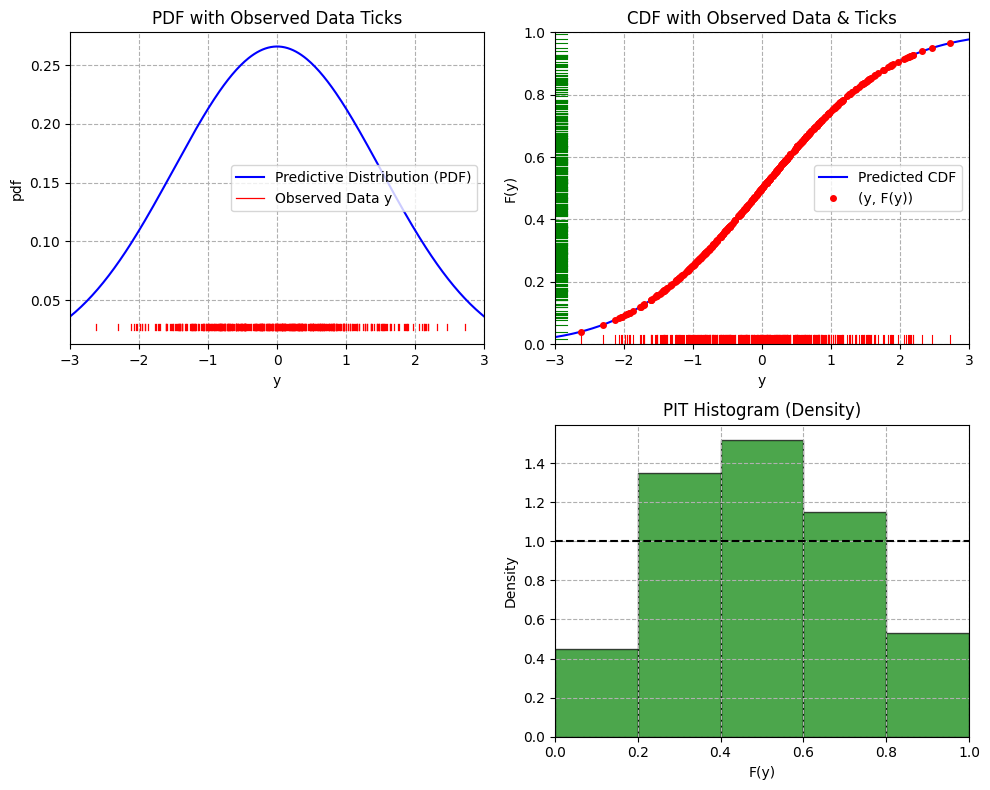

In [53]:
np.random.seed(42)
y_obs_example = np.random.normal(loc=0, scale=1, size=500)
fig, axes = plot_pit_calibration(y_obs_example, norm(loc=0, scale=1.5), bins=5)
plt.show()

#### Alternative Plotting using QQ-Plots


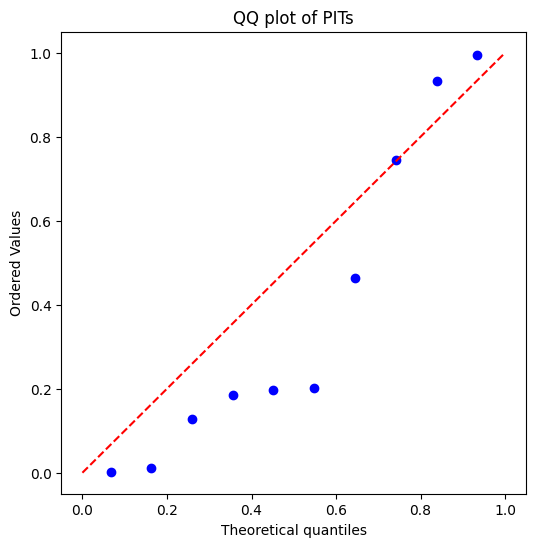

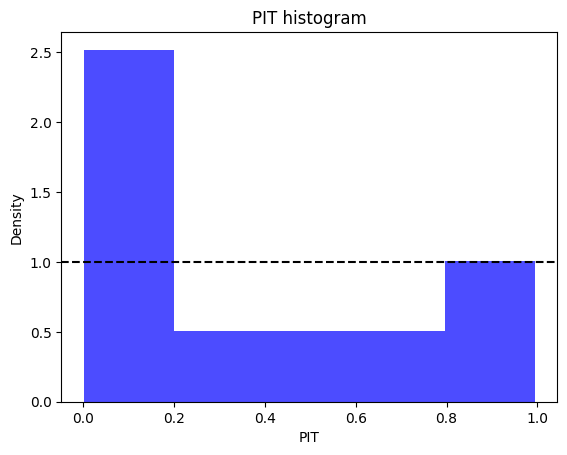

In [75]:
y_obs_example = np.random.normal(loc=0, scale=1, size=10)
dist = norm(loc=0, scale=0.5)
pits = dist.cdf(y_obs_example)

# Create QQ plot
plt.figure(figsize=(6, 6))
stats.probplot(pits, dist="uniform", plot=plt, fit=False, rvalue=True)
# Add a reference line
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('QQ plot of PITs')
plt.show()

plt.hist(pits, bins=5, density=True, color='blue', alpha=0.7)
plt.axhline(y=1, color='k', linestyle='--')
plt.title('PIT histogram')
plt.xlabel('PIT')
plt.ylabel('Density')
plt.show()

## Score Divergence for NLL (log-Score)

We assume a fixed value for clarity and so $S(p(y'|x), y)=S(p(y'),y)=-\ln(y)$. 
The Score Divergence of the NLL is the KL-Divergence.

$$
D(G, P) = \int S(p(y'), y') g(y') dy' - \int S(g(y'), y') g(y') dy'
$$

$$
= -\int \ln(p(y')) g(y') dy' - \left( -\int \ln(g(y')) g(y') dy' \right)
$$
<!-- $$
= -\mathbb{E}_{G}[\ln(p(y'))] + \mathbb{E}_{G}[\ln(g(y'))]
$$ -->
$$
= \int g(y') \ln \left( \frac{g(y')}{p(y')} \right) dy'
$$
$$
= D_{KL} (G \| P)
$$

\( D_{KL}(G \| P) \geq 0 \) and \( D_{KL}(G \| P) = 0 \iff P = G \)

\( \Rightarrow \) NLL is strictly proper scoring rule


1.2067083030096615
0.5158422296716948
0.4422402371843583
1.4381563021219272
1.0448490172033256


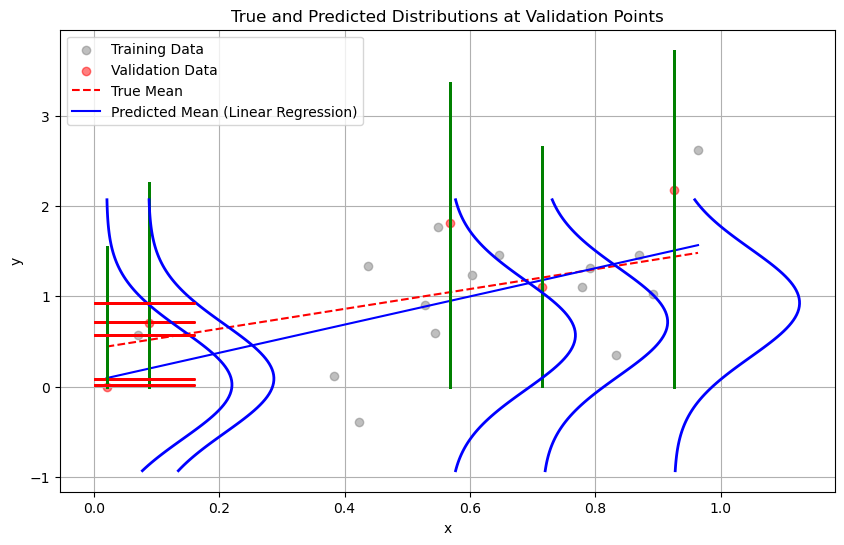

In [33]:
from sklearn.linear_model import LinearRegression
import numpy as np
np.random.seed(0)  # For reproducibility
N = 20  # Number of data points

# A simple data generating process 
x = np.random.uniform(0,1,N) # N values for x
y = np.random.normal(1.1 * x + 0.42, 0.5, N)

# Sorting the x values for plotting
sorted_indices = np.argsort(x)
x_sorted = x[sorted_indices]
y_sorted = y[sorted_indices]

y_true_mean = 1.1 * x_sorted + 0.42
# Let's split the data into training and validation sets first.
# Since we want to choose 5 points for validation, we'll use random choice for this.

validation_indices = np.random.choice(np.arange(N), size=5, replace=False)
training_indices = np.setdiff1d(np.arange(N), validation_indices)

# Split the data
x_train, y_train = x[training_indices], y[training_indices]
x_val, y_val = x[validation_indices], y[validation_indices]

# Perform linear regression on the training data
lin_reg = LinearRegression()
lin_reg.fit(x_train.reshape(-1, 1), y_train)

# Predicting across the entire range of x
y_pred_lin_reg = lin_reg.predict(x_sorted.reshape(-1, 1))

# Calculating residuals and standard deviation of the residuals for training data
residuals_train = y_train - lin_reg.predict(x_train.reshape(-1, 1))
std_residuals_train = np.std(residuals_train)

# Create the plot
plt.figure(figsize=(10, 6))

# Scatter plot for training data
plt.scatter(x_train, y_train, color='grey', alpha=0.5, label='Training Data')

# Scatter plot for validation data
plt.scatter(x_val, y_val, color='red', alpha=0.5, label='Validation Data')

# True mean line (without noise)
plt.plot(x_sorted, y_true_mean, 'r--', label='True Mean')

# Linear regression predicted mean line
plt.plot(x_sorted, y_pred_lin_reg, 'b-', label='Predicted Mean (Linear Regression)')

# Plot the prediction and true distributions at the validation points
num_points_pdf = 100
for val_x, val_y in zip(x_val, y_val):
    y_pdf = np.linspace(y_true_mean_pdf - 3 * 0.5, y_true_mean_pdf + 3 * 0.5, num_points_pdf)
    # For true PDF (red)
    y_pdf = np.linspace(norm.pdf(y_pdf, loc=val_x, scale=0.5), norm.ppf(0.999, loc=val_y, scale=0.5), 100)
    pdf = norm.pdf(y_pdf, loc=val_y, scale=0.5)
    plt.plot(np.full_like(y_pdf, val_x), y_pdf, 'g', lw=2)


    
    y_true_mean_pdf = 1.1 * val_x + 0.42  # The true distribution
    print(y_true_mean_pdf)
    y_pdf = np.linspace(y_true_mean_pdf - 3 * 0.5, y_true_mean_pdf + 3 * 0.5, num_points_pdf)
    y_pdf = norm.pdf(y_pdf, loc=y_true_mean_pdf, scale=0.5)  # The true distribution
    y_pdf = y_pdf  * 0.2  # Scaling for plotting
    plt.plot(y_pdf,np.full(fill_value=val_x, shape=y_pdf.shape), 'r-', lw=2)
    
    # Predicted PDF
    pred_mean = lin_reg.predict([[val_x]])[0]
    y_pred_pdf = norm.pdf(x_pdf, loc=val_x, scale=std_residuals_train) * std_residuals_train * np.sqrt(2 * np.pi)
    y_pred_pdf = y_pred_pdf / y_pred_pdf.max() * 0.2
    plt.plot(y_pred_pdf + val_x, x_pdf,'b-', lw=2)

# Labels, title and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('True and Predicted Distributions at Validation Points')
plt.legend()
plt.grid(True)
plt.show()